In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [3]:
def get_data(phi, w, par, L, dx, type, wr):
    cmd = 'c:/users/coolg/modeling/wk7/m.exe'+' '+str(phi)+' '+str(w)+' '+str(par)+' '+str(L)+' '+str(dx)+' '+type+' '+wr
    returned_output = subprocess.check_output(cmd)
    #print(returned_output.decode('utf-8'))
    return pd.DataFrame(np.fromfile('modeled_data.binary', dtype=np.dtype([
                ('phi', np.float64), 
                ('w', np.float64), 
                ('par', np.float64)
            ])))

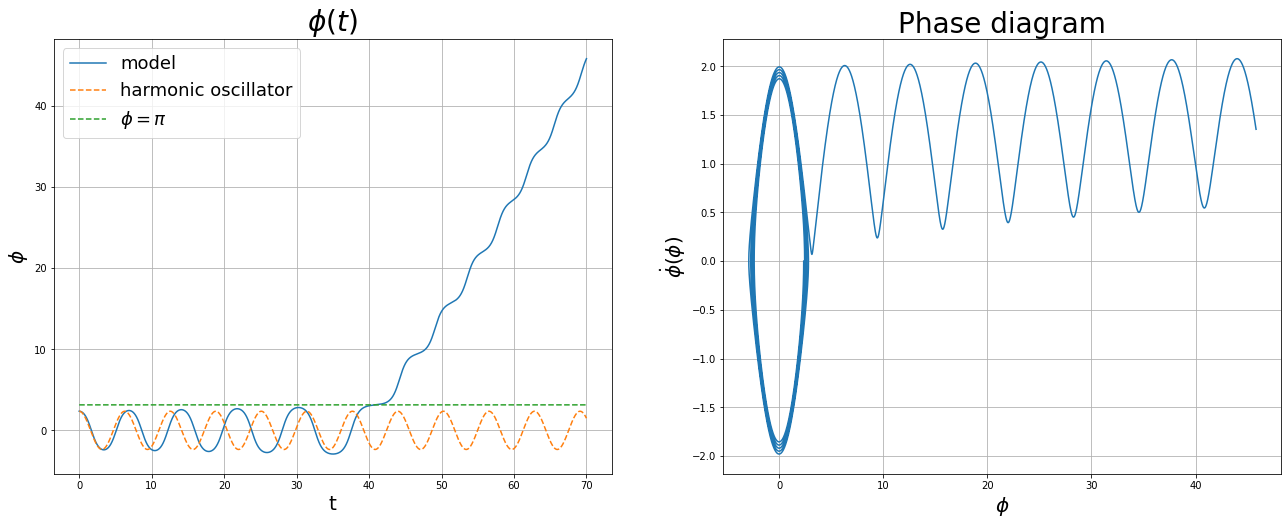

In [4]:
data = get_data(phi = 3*np.pi / 4, w = 0, par = 1, L = 100, dx = 0.01, type='euler', wr='write')

fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,8)

ax[0].set_title('$\phi(t)$', fontsize=28)
ax[1].set_title('Phase diagram', fontsize=28)

t = np.linspace(0, 70, len(data.phi))
ax[0].plot(t, data.phi, label='model')
#ax[0].plot(t, data.w)
ax[1].plot(data.phi, data.w)

ax[0].plot(t, 3 * np.pi / 4 * np.cos(t), '--', label='harmonic oscillator')
ax[0].plot(t, np.pi+t-t, '--', label='$\phi=\pi$')

ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylabel('$\phi$', fontsize=20)
ax[0].set_xlabel('t', fontsize=20)
ax[1].set_ylabel('$\dot{\phi}(\phi)$', fontsize=20)
ax[1].set_xlabel('$\phi$', fontsize=20)

ax[0].legend(loc='best', fontsize=18)
plt.show()

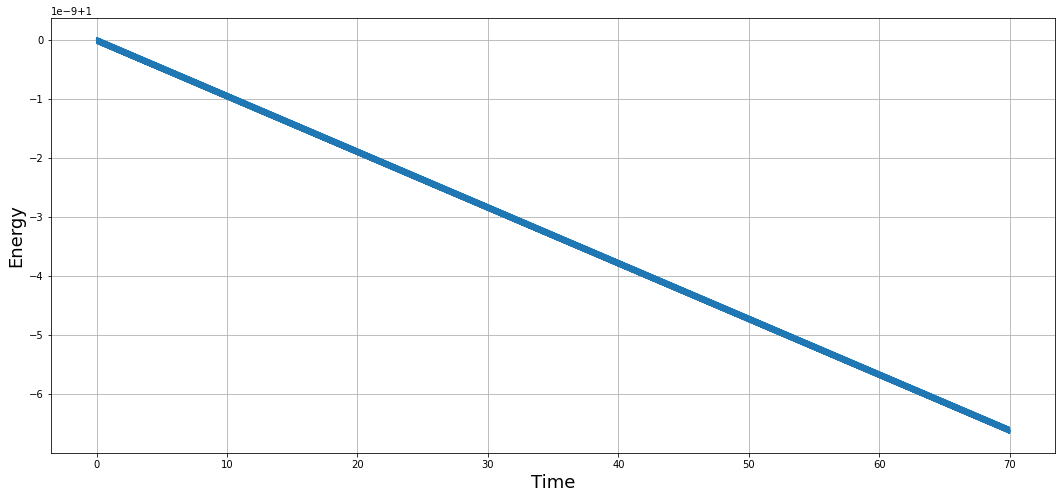

In [22]:
E = (0.5*data.w**2+1-np.cos(data.phi))/(0.5*data.w[0]**2+1-np.cos(data.phi[0]))
fig, ax = plt.subplots()
fig.set_size_inches(18,8)
ax.plot(t, E)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Energy', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
ax.grid(True)
plt.show()